In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn을 사용하여 stripplot 생성
import os
from pydub import AudioSegment

In [5]:
def get_audio_length(file_path):
    audio = AudioSegment.from_mp3(file_path)
    return len(audio) / 1000  # milliseconds to seconds

def get_text_length(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return len(text)

def calculate_chars_per_minute(audio_length, text_length):
    minutes = audio_length / 60
    return text_length / minutes if minutes > 0 else 0


In [ ]:
# 데이터 수집
audio_folder = 'ebs_audio_combined_1~45'
text_folder = 'ebs_audio_combined_1~45_txt'

data = []

for i in range(1, 46):
    audio_file = os.path.join(audio_folder, f'{i:02d}강_combined.mp3')
    text_file = os.path.join(text_folder, f'{i:02d}강_combined_transcription.txt')
    
    audio_length = get_audio_length(audio_file)
    text_length = get_text_length(text_file)
    chars_per_minute = calculate_chars_per_minute(audio_length, text_length)
    
    data.append(chars_per_minute)

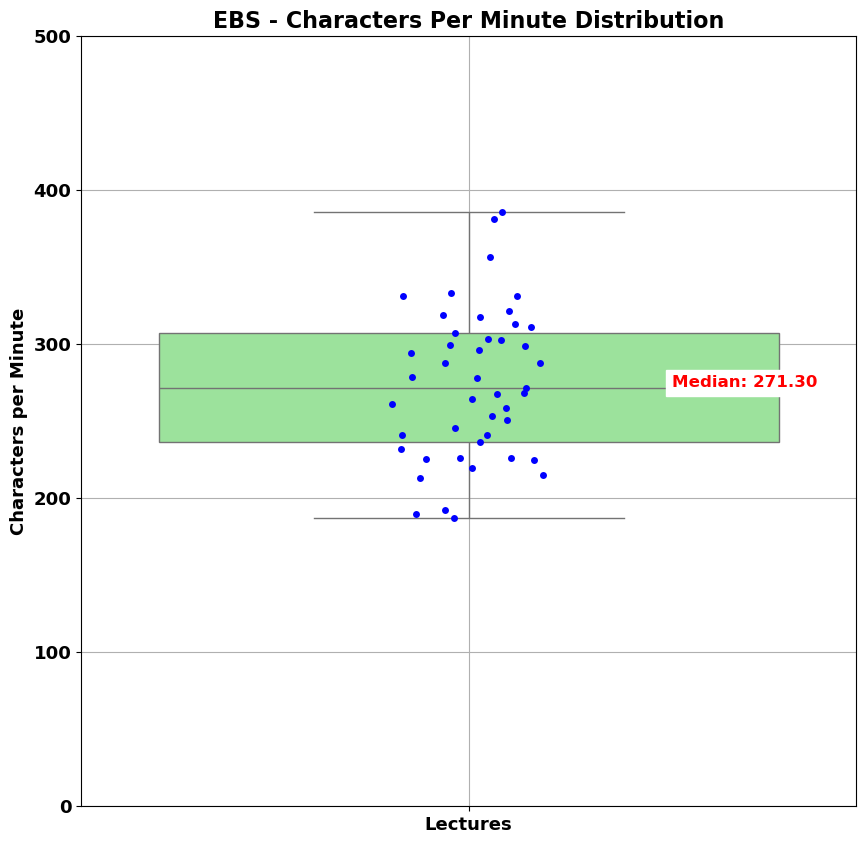

In [6]:
# 중앙값 계산
median = np.median(data)

# 박스플롯 및 스트립플롯 생성
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=data, orient='v', color='lightgreen')  # 세로 방향 박스플롯
sns.stripplot(data=data, orient='v', color='blue', jitter=True)  # 세로 방향 스트립플롯

plt.title('EBS - Characters Per Minute Distribution', fontsize=16, fontweight='bold')
plt.xlabel('')  # x축에 'Lecture' 레이블 추가
plt.ylabel('Characters per Minute', fontweight='bold', fontsize=13)  # y축에 'Characters/Minute' 레이블 추가

# y축 스케일을 특정 값으로 설정
plt.yticks([0, 100, 200, 300, 400, 500], fontweight='bold', fontsize=13)
plt.xticks([0], ['Lectures'], fontweight='bold', fontsize=13)  # 단일 데이터 세트이므로 x축에 하나의 레이블만 추가

# 중앙값을 오른쪽 가운데에 표시
plt.text(0.95, 0.55, f'Median: {median:.2f}', color='red', ha='right', va='center', 
         fontweight='bold', fontsize=12, transform=ax.transAxes, backgroundcolor='white')

plt.grid(True)
plt.show()
